In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Randomly generate two sets of 1000 2D points each from Gaussian distribution lying on a plane having same standard deviation of 1.5 and different means at [5,5] and [10,10].


In [2]:
#Drawing samples from the distribution:

np.random.seed(seed=1897)

#First set of 1000x2
mu = 5
sigma= 1.5 # mean and standard deviation
set1 = np.random.normal(mu, sigma,(1000,2))

#second set of 1000x2

mu2=10 # mean and standard deviation
set2 = np.random.normal(mu2, sigma,(1000,2))

print (' the dimensions of dataset1 is: \n' ,set1.shape)
print (' \nthe dimensions of dataset2 is: \n', set2.shape)

 the dimensions of dataset1 is: 
 (1000, 2)
 
the dimensions of dataset2 is: 
 (1000, 2)


## 2. Concatenate the two sets to have another set of points Z. The dimension of the Z should be 20000 x 2.


In [3]:
a=np.concatenate((set1,set2), axis=0)
print (' \nthe dimensions of dataset2 is: \n', a.shape)


 
the dimensions of dataset2 is: 
 (2000, 2)


## 3. Randomly initialize 2 cluster centers and plot them along with the points in Z


In [4]:
centroids=15*np.random.random((2, 2))
print('the selected centroids are:\n',centroids)

the selected centroids are:
 [[ 12.69127187   4.63644456]
 [ 12.25498929   5.35655581]]


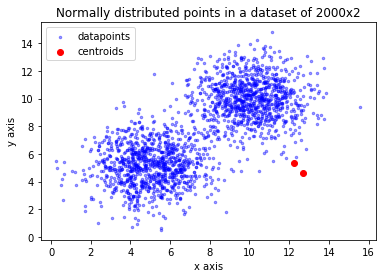

In [5]:
#plotting centroids and datapoints

X= a[:,0]
Y= a[:,1]
C1=centroids[:,0]
C2=centroids[:,1]

plt.scatter(X,Y, color='b',alpha=0.4, s=25, marker='.')
plt.scatter(C1,C2,color='r')


plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Normally distributed points in a dataset of 2000x2')
plt.legend([ 'datapoints','centroids'])

#saving plot
plt.savefig('task3.jpg')

#displaying graph
plt.show()


### 4. Assign each point in Z to the cluster center closest to it using Euclidean distance
### 5. Visualize the assignments by plotting in one color every point assigned to a specific center (i.e., for 2 cluster centers, all points will have 1 out of 2 colors)
### 6. For all points assigned to one cluster, take mean of points
### 7. Repeat steps 3 to 6 with the cluster centers as two new means for 100 such iterations
### 8. Visualize the final assignments


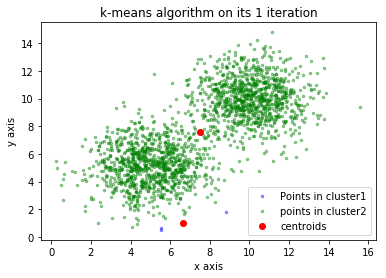

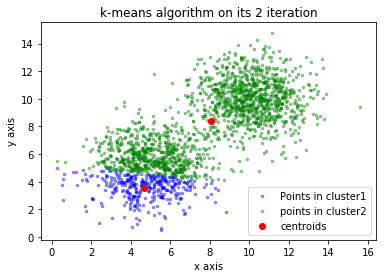

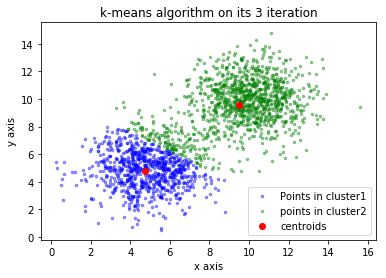

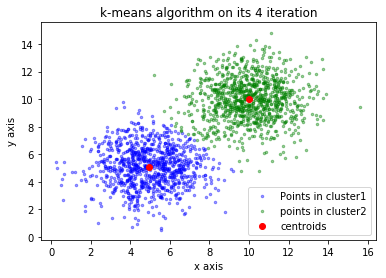

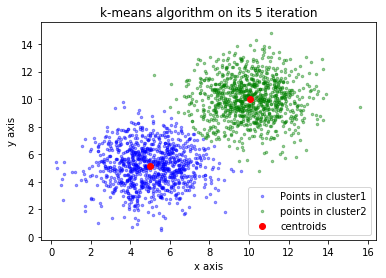

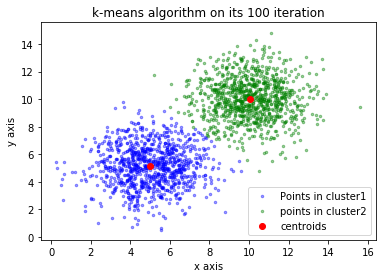

In [6]:
iter=1
while (iter<101):  
    
    #empty cluster list everytime. Only needed for visualisation
    
    cluster1=[]
    cluster2=[]
    
    #defining cluster centroids:
    centroid1 = centroids[0,:]
    centroid2 = centroids[1,:]
    
    #itererating over each point in the dataset:
    for i in range (0,1999):
        
        current_point = a[i,:]
        
        #claculating euclidean distance from each cluster centroid
        dist_from_c1 = np.sqrt(np.sum((current_point-centroid1)**2))
        dist_from_c2 = np.sqrt(np.sum((current_point-centroid2)**2))
        
        
        
        #checking assignment criteria to determine which cluster to assign the point to:
        if dist_from_c1< dist_from_c2:
            
            cluster1.append(current_point)
            
        else: 
            
            cluster2.append(current_point)
    
    
    # convert cluster lists to numpy array:
    cluster11 = np.array(cluster1)
    cluster22=np.array(cluster2)
    
    #calculate mean of a 2D numpy array axis wise and assign as new centroids
    centroids[0,:]=np.mean(cluster11,axis=0)
    centroids[1,:]=np.mean(cluster22,axis=0)
    
    
    #print graph for first 5 iterations as it converges quickly and the final graph:
    if ((iter <=5) or (iter==100)):
       
        #plot data
        
        cluster1_x= cluster11[:,0]
        cluster1_y= cluster11[:,1]
        cluster2_x= cluster22[:,0]
        cluster2_y= cluster22[:,1]
        C1=centroids[:,0]
        C2=centroids[:,1]
        
        #plot style

        plt.scatter(cluster1_x,cluster1_y,alpha=0.4, s=25, color='b',marker='.' )
        plt.scatter(cluster2_x,cluster2_y, alpha=0.4,s=25, color='g', marker='.')
        plt.scatter(C1,C2,color='r')
        
        #plot labels
        
        plt.xlabel('x axis')
        plt.ylabel('y axis')
        plt.title('k-means algorithm on its %d iteration' %(iter)) 
        plt.legend([ 'Points in cluster1','points in cluster2', 'centroids'])

        
        #save plots
        plt.savefig('kmean-iteration{0}.jpg'.format(iter))
        
        plt.show()
    
    iter+=1
   

## Final observation:

Kmeans brings the cluster centers near the originally niitilaized means of the datsasets, [5,5] and [10,10].

In [7]:
#new centroids:

print("centroid for cluster 1: \n", centroids[0,:])
print("centroid for cluster 2: \n", centroids[1,:])

centroid for cluster 1: 
 [ 4.99685048  5.14575765]
centroid for cluster 2: 
 [ 10.05754254  10.03414976]
